In [41]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt
import os

# Working with time Series
We first download the data with our api key.

In [9]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
# We can describe it
data.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,77.552948,77.564301,77.541970,77.552675,5.578085e+04
std,0.040049,0.037685,0.043049,0.040161,2.904651e+05
min,77.460000,77.490000,77.420000,77.445000,5.000000e+02
25%,77.520000,77.535150,77.510000,77.520000,1.101950e+04
50%,77.553850,77.560000,77.540000,77.555000,1.657750e+04
75%,77.590000,77.600000,77.572500,77.590000,3.141550e+04
max,77.635000,77.640000,77.620000,77.634700,2.914963e+06


Check the meta data given back by the api call.

In [27]:
meta_data

{'1. Information': 'Intraday (1min) prices and volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2017-10-13 16:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

## Plotting time series

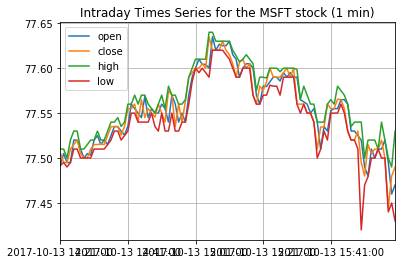

In [26]:
data.plot(y=['open','close', 'high', 'low'])
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

# Working with technical indicators

In [30]:
ti = TechIndicators(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Lower Band,Real Middle Band,Real Upper Band
count,11.000000,11.000000,11.000000
mean,73.816245,75.771745,77.727264
std,0.075885,0.150729,0.227301
min,73.728900,75.555700,77.382600
25%,73.757200,75.651500,77.545850
50%,73.803700,75.770200,77.736700
75%,73.862600,75.883700,77.904850
max,73.961800,76.006300,78.050800


In [31]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2017-10-13 16:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

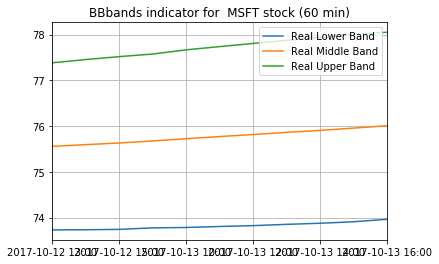

In [33]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

# Working with Sector Performance

In [35]:
sp = SectorPerformances(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,-0.000336,-0.000336,-0.000064,0.019609,0.040373,0.096282,0.147355,0.273560,0.669650,0.599990
std,0.004455,0.004455,0.018046,0.026144,0.021682,0.121722,0.135128,0.240311,0.441276,0.643029
min,-0.007600,-0.007600,-0.046400,-0.012500,0.003900,-0.133100,-0.074100,-0.178000,-0.073000,-0.149400
25%,-0.002800,-0.002800,-0.006500,-0.003450,0.029400,0.063950,0.054000,0.209075,0.490300,0.009850
50%,-0.000400,-0.000400,0.001400,0.015700,0.037100,0.120500,0.153200,0.282800,0.756800,0.495350
75%,0.003200,0.003200,0.013250,0.042200,0.054150,0.154300,0.248050,0.415875,1.024075,1.180750
max,0.005200,0.005200,0.017700,0.056300,0.080400,0.296000,0.336600,0.669500,1.185100,1.465100


In [36]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '04:20 PM ET 10/13/2017'}

## Plotting Sector Performance

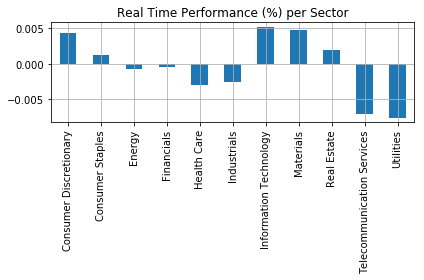

In [38]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [42]:
cc = CryptoCurrencies(key=os.environ['API_KEY'])
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='BTC',to_currency='USD')
data 

{'1. From_Currency Code': 'BTC',
 '2. From_Currency Name': 'Bitcoin',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '5566.80500105',
 '6. Last Refreshed': '2017-10-15 15:13:08',
 '7. Time Zone': 'UTC'}

To get the intraday price of bitcoin 

In [44]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

,. price (CNY),. price (USD),volume,market cap (USD)
count,922.000000,922.000000,922.000000,9.220000e+02
mean,36267.767071,5510.730786,7910.785679,4.354742e+07
std,1432.573143,220.219235,2888.647946,1.618157e+07
min,32541.176397,4939.612070,4162.087172,2.358883e+07
25%,36003.603378,5472.545524,4898.628192,2.755651e+07
50%,36804.422588,5592.983669,7553.729367,4.005520e+07
75%,37225.613047,5657.978688,10978.945590,6.144114e+07
max,38472.919043,5850.945143,13696.462618,7.641150e+07


In [45]:
data.head(5)

,. price (CNY),. price (USD),volume,market cap (USD)
2017-10-12 10:25:00,32541.176397,4939.612070,6608.779563,3.264481e+07
2017-10-12 10:30:00,32627.535231,4952.720974,6650.948551,3.294029e+07
2017-10-12 10:35:00,32631.085682,4953.335107,6656.276985,3.297077e+07
2017-10-12 10:40:00,32624.721536,4952.369042,6660.270595,3.298412e+07
2017-10-12 10:45:00,32626.895455,4952.699038,6659.941360,3.298469e+07


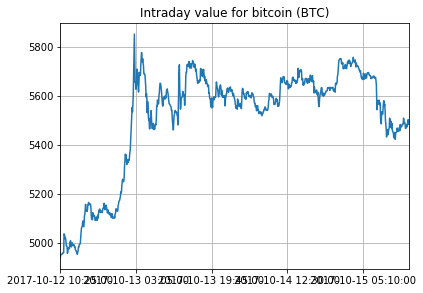

In [48]:
data['. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()